In [7]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('log2.csv')

<h1>Initial Analysis (EDA)</h1>

In [ ]:
df.sample(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [17]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [18]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

<h4>NO NULL VALUES!!</h4>

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

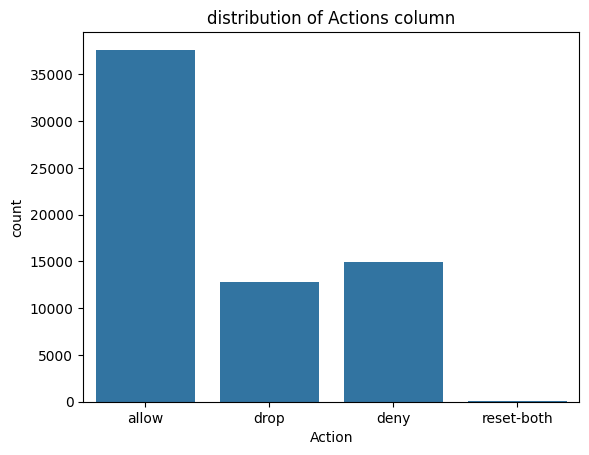

In [47]:
sns.countplot(x='Action', data=df)
plt.title('distribution of Actions column')
plt.show()

<h5>The graph is unimodal, the firewall breaching attempts are allowed more than 50% of the time</h5>

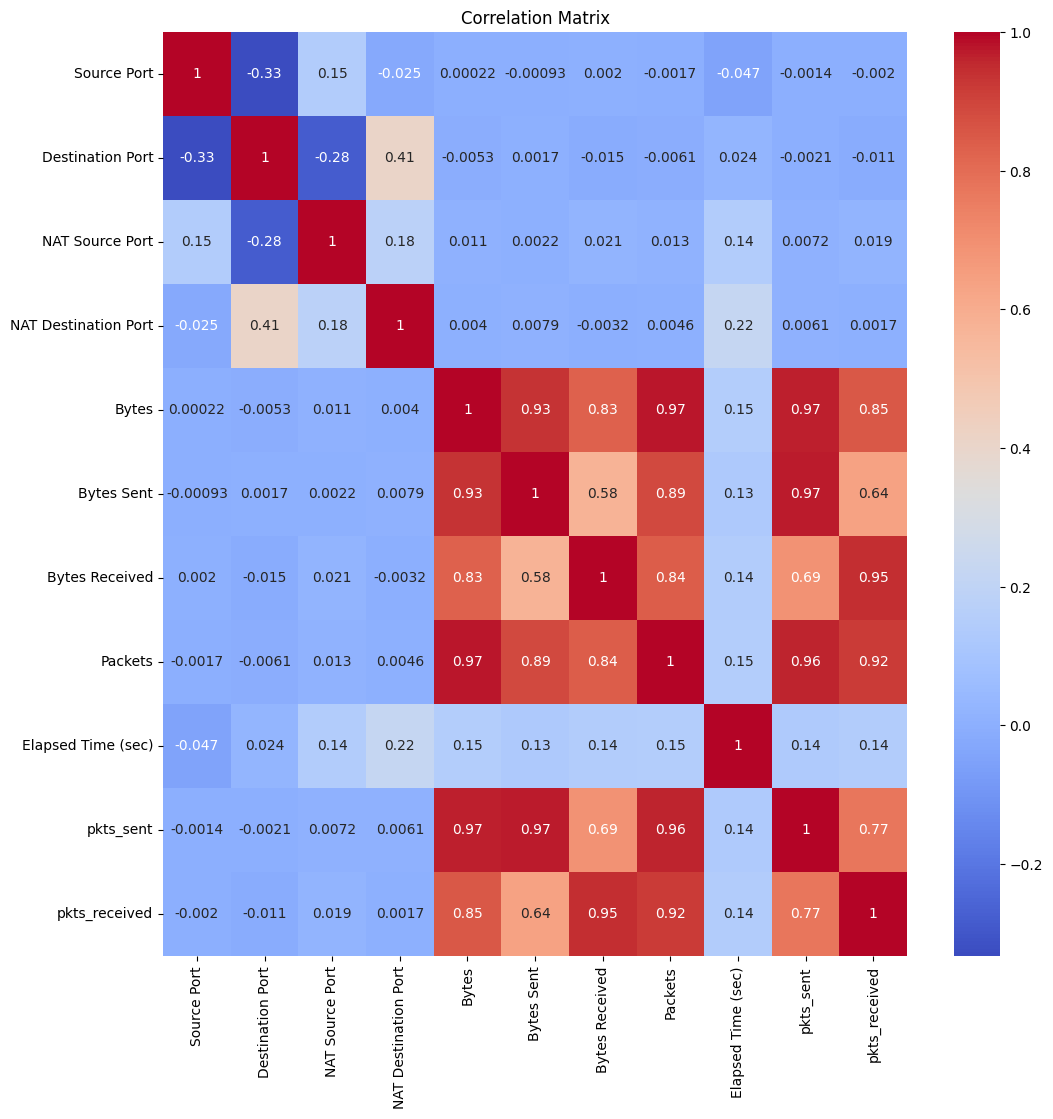

In [43]:
numerical_data = df.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h3>Heatmap of the numerical values, excluding the Action column</h3>

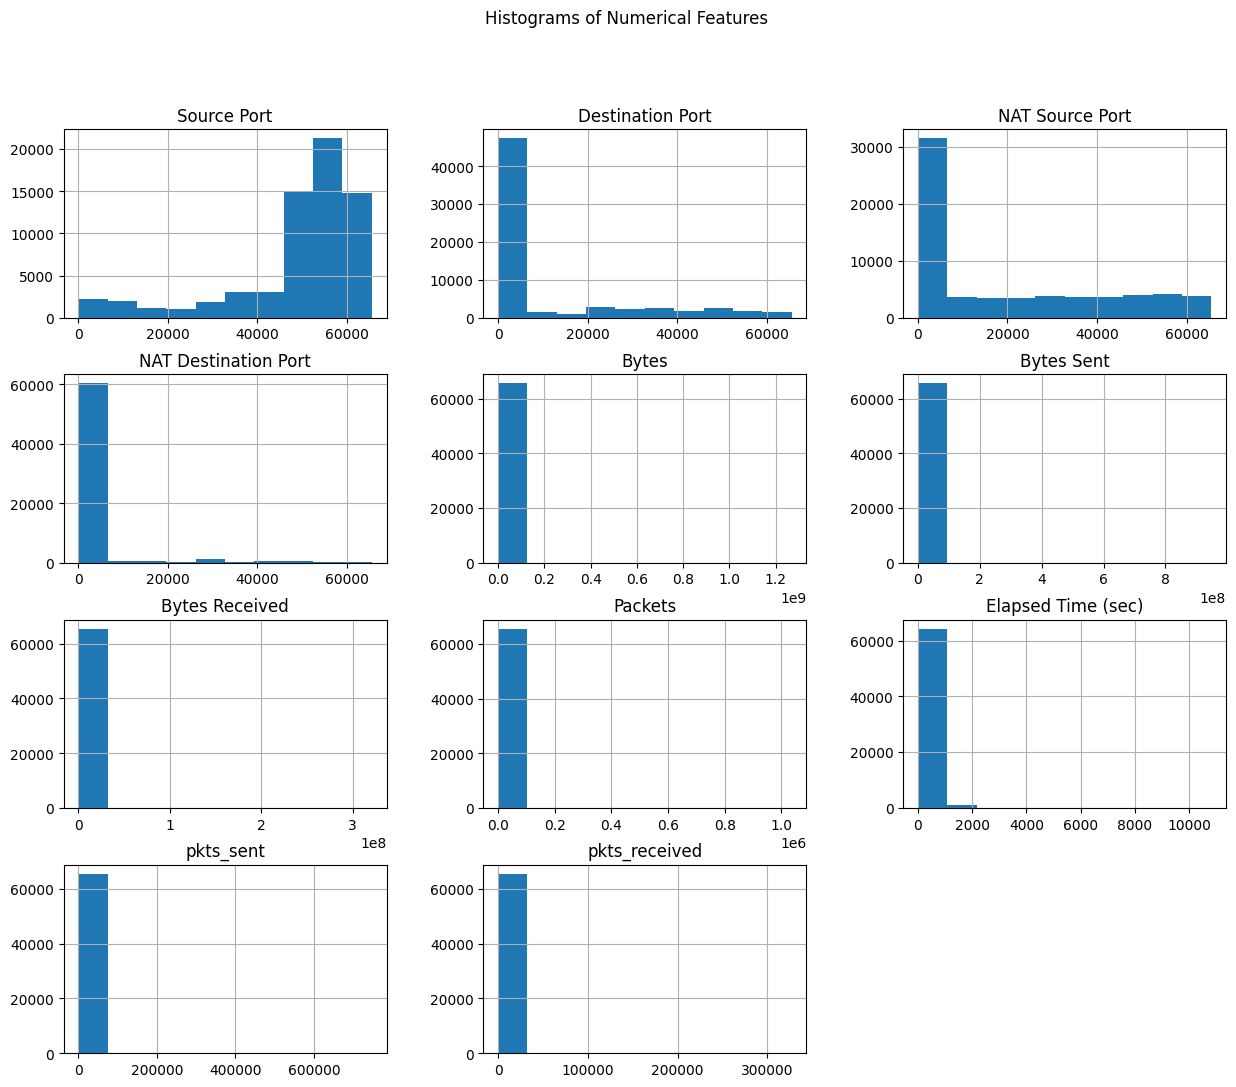

In [53]:
numerical_data.hist(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Features')
plt.show()

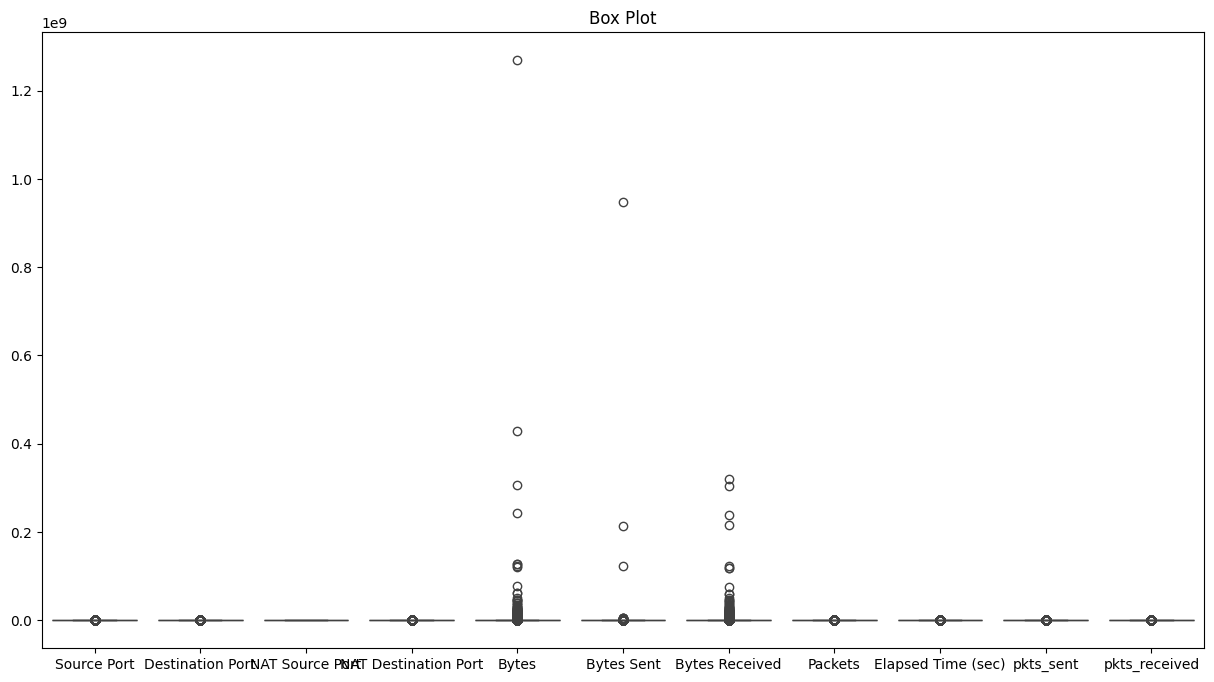

In [61]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=numerical_data)
plt.title('Box Plot')
plt.show()

<h3>extreme outliers are noticed in the 'bytes' and 'bytes sent' columns</h3>
<p>we will consider removing them </p>

<h1>Preparation of data</h1>

<h3>to remove extreme outliers, we will apply winsorization to the Bytes & Bytes Sent columns</h3>

In [78]:
from scipy.stats.mstats import winsorize

bytes_95th_percentile = df['Bytes'].quantile(0.95)
bytes_sent_95th_percentile = df['Bytes Sent'].quantile(0.95)

df['Bytes'] = df['Bytes'].apply(lambda x: bytes_95th_percentile if x == df['Bytes'].max() else x)
df['Bytes Sent'] = df['Bytes Sent'].apply(lambda x: bytes_sent_95th_percentile if x == df['Bytes Sent'].max() else x)


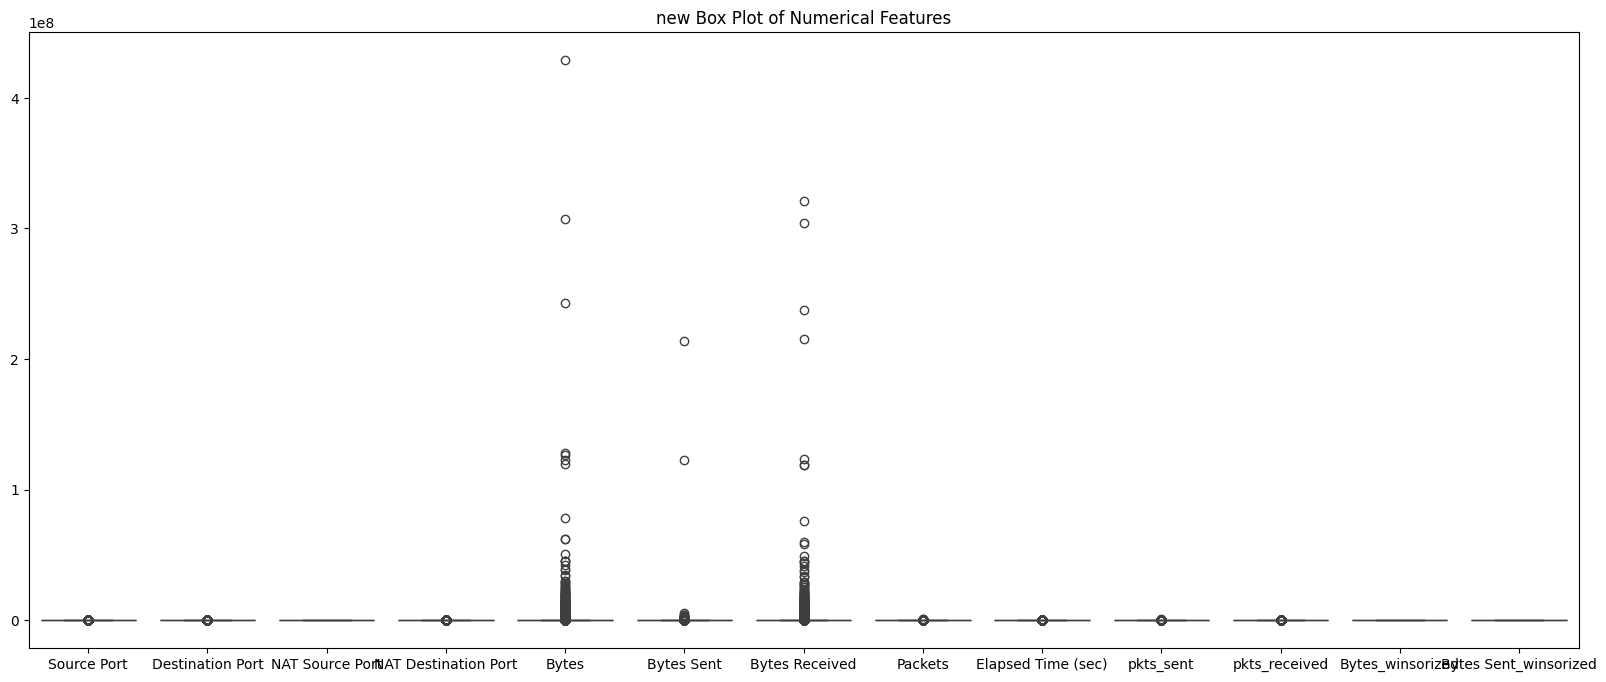

In [80]:
plt.figure(figsize=(20, 8))
numerical_data = df.select_dtypes(include='number')
sns.boxplot(data=numerical_data)
plt.title('new Box Plot of Numerical Features')
plt.show()

<h3>we replaced the extereme outliers with less extreme values from the 95th percentile</h3>
<h4>will reduce the remaining outliers in the future if needed</h4>

<h3>Replacing the action column values with numerical values:</h3>

In [88]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Action_encoded'] = label_encoder.fit_transform(df['Action'])

In [97]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action,Action_encoded
0,57222,53,54587,53,177.0,94.0,83,2,30,1,1,allow,0
1,56258,3389,56258,3389,4768.0,1600.0,3168,19,17,10,9,allow,0
2,6881,50321,43265,50321,238.0,118.0,120,2,1199,1,1,allow,0
3,50553,3389,50553,3389,3327.0,1438.0,1889,15,17,8,7,allow,0
4,50002,443,45848,443,25358.0,6778.0,18580,31,16,13,18,allow,0


In [95]:
df.drop(['Bytes_winsorized'], axis=1, inplace=True)
df.drop(['Bytes Sent_winsorized'], axis=1, inplace=True)

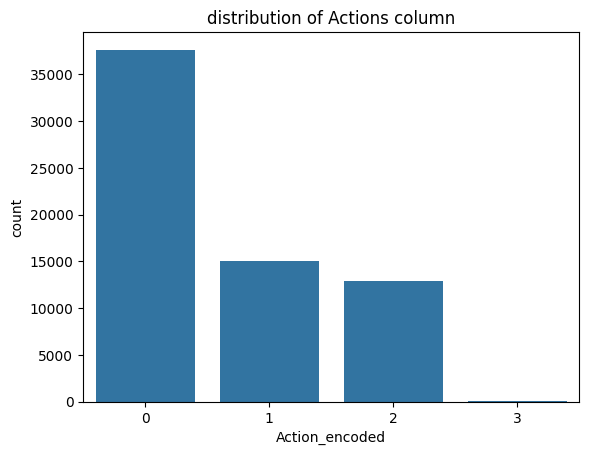

In [99]:
sns.countplot(x='Action_encoded', data=df)
plt.title('distribution of Actions column')
plt.show()

<h2>('allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3)</h2>

In [101]:
df['Action'] = df['Action_encoded']
df.drop(['Action_encoded'], axis=1, inplace=True)

In [102]:
df.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177.0,94.0,83,2,30,1,1,0
1,56258,3389,56258,3389,4768.0,1600.0,3168,19,17,10,9,0
2,6881,50321,43265,50321,238.0,118.0,120,2,1199,1,1,0
3,50553,3389,50553,3389,3327.0,1438.0,1889,15,17,8,7,0
4,50002,443,45848,443,25358.0,6778.0,18580,31,16,13,18,0


<h4>Standard Scaling the numerical data to standardize the data in our DF</h4>

In [110]:
from sklearn.preprocessing import StandardScaler

# Exclude 'Action' column
numerical_data = df.drop('Action', axis=1)


standard_scaler = StandardScaler()
numerical_data_scaled = standard_scaler.fit_transform(numerical_data)

# Convert scaled data back to another df
scaled_df = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

In [111]:
scaled_df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.513256,-0.569937,1.606882,-0.268819,-0.029359,-0.008120,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0.450066,-0.389279,1.682938,0.073718,-0.027621,-0.006556,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,-2.786582,2.152272,1.091555,4.892650,-0.029336,-0.008095,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,0.076105,-0.389279,1.423272,0.073718,-0.028167,-0.006724,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0.039987,-0.548817,1.209121,-0.228774,-0.019829,-0.001178,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550


In [112]:
scaled_df['Action'] = df['Action']

In [113]:
scaled_df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,0.513256,-0.569937,1.606882,-0.268819,-0.029359,-0.008120,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197,0
1,0.450066,-0.389279,1.682938,0.073718,-0.027621,-0.006556,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598,0
2,-2.786582,2.152272,1.091555,4.892650,-0.029336,-0.008095,-0.030293,-0.019651,3.746507,-0.012551,-0.027197,0
3,0.076105,-0.389279,1.423272,0.073718,-0.028167,-0.006724,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498,0
4,0.039987,-0.548817,1.209121,-0.228774,-0.019829,-0.001178,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550,0


<h3>Splitting our dataset into training and testing sets (80-20 split)</h3>


In [122]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = scaled_df.drop('Action', axis=1)  # Features (excluding the 'Action' column)
y = scaled_df['Action']  # Target variable ('Action' column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Training Models:</h1>

<h2>1 - Random Forest</h2>


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest classifier:", accuracy_rf)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest classifier: 0.9984740978103304

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7545
           1       1.00      1.00      1.00      2994
           2       1.00      1.00      1.00      2562
           3       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107

